Name - Timothy Yap

Student ID - 21611367

Code below is for 2)d)

In [32]:
# Required libraries
import numpy as np
import scipy
import matplotlib.pyplot as plt
import time

# 2)d) Recursive function
def recursive_lu(M):
    n = M.shape[0]
    # Base case 2x2 matrix
    if n == 2:  
        # Setting base case for M matrix
        M_11 = M[0, 0]
        M_12 = M[0, 1]
        M_21 = M[1, 0]
        M_22 = M[1, 1]
        
        # Calculating L matrix
        L_11 = np.array([1])
        L_21 = M_21 / M_11
        L_22 = np.array([1])
        
        # Calculating U matrix
        U_11 = M_11
        U_12 = M_12
        U_22 = M_22 - L_21 * U_12
        
        # Returning combined L_ij and U_ij matrices
        L_main = np.block([[L_11, np.array([0])],[L_21, L_22]])
        U_main = np.block([[U_11, U_12],[np.array([0]), U_22]])
        return L_main, U_main
    else:
        # Splitting into blocks
        m = int(n/2)
        M_11 = M[:m , :m]
        M_12 = M[:m , m:]
        M_21 = M[m: , :m]
        M_22 = M[m: , m:]
        
        # Calculating L and U matrix
        L_11, U_11 = recursive_lu(M_11)
        L_11_inv = np.linalg.inv(L_11)
        U_12 = L_11_inv @ M_12
        L_21 = np.dot(M_21, np.linalg.inv(U_11))
        
        # Using the recursive matrix to find LU decomp. (explained in part b))
        L_22, U_22 = recursive_lu(M_22 - L_21 @ U_12)
        
        # Returning combined L_ij and U_ij matrices
        L_main = np.block([[L_11, np.zeros((m,m))],[L_21, L_22]])
        U_main = np.block([[U_11, U_12],[np.zeros((m,m)), U_22]])
        return L_main, U_main

# using the part 2) economic array as an example
econ_array = np.array([[0.8,-0.25,-0.1,-0.1],
              [-0.15,0.9,-0.005,-0.005],
              [-0.3,-0.6,0.9,-0.3],
              [-0.6,-0.5,-0.1,0.9]])

L, U = recursive_lu(econ_array)
print("L:\n", L)
print("\n")
print("U:\n", U)

L:
 [[ 1.          0.          0.          0.        ]
 [-0.1875      1.          0.          0.        ]
 [-0.375      -0.81318681  1.          0.        ]
 [-0.75       -0.80586081 -0.23024458  1.        ]]


U:
 [[ 0.8        -0.25       -0.1        -0.1       ]
 [ 0.          0.853125   -0.02375    -0.02375   ]
 [ 0.          0.          0.84318681 -0.35681319]
 [ 0.          0.          0.          0.7237065 ]]


Code below is for 2)e)

Plot highlights the exponential runtime as k increases. Would suggest the my code runs exponentially as inputs are exponential.

[6.98232651e-01 9.51385498e-01 2.16422081e+00 4.85105515e+00
 9.96012688e+00 2.08866835e+01 6.21380806e+01 1.29368186e+02
 3.30345201e+02 7.86258435e+02]


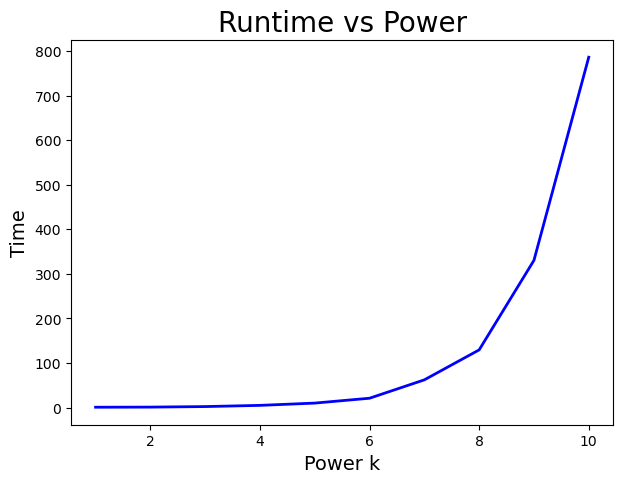

In [28]:
# Runtime code
# x, y arrays
time_array = np.zeros(10)
n_power = np.arange(1,11)

# Checking for powers 1 - 10
for i in range(1, 11):
    start = time.time()
    # Averaging 30 runs
    for j in range(1, 31):
        A = np.random.rand(2**i, 2**i)
        L, U = recursive_lu(A)
    end = time.time()
    time_array[i - 1] = (end-start) * 10**2
print(time_array)

# Plotting graph
plt.figure(figsize=(7,5))
plt.plot(n_power, time_array, "b-", lw = 2)

# Graph settings
plt.xlabel("Power k", fontsize=14)
plt.ylabel("Time", fontsize=14)
plt.title("Runtime vs Power", fontsize=20)
plt.show()   